# Prepare Nançay data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the data from a specific burst
datadir = "/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/data/data_Nancay/"
resdir = "/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/data/data_Nancay/"

### Explore data
The data is already in S/N, so we don't have to normalize it. 

In [104]:
file = "Nancay2.npy"
data = np.loadtxt(datadir + file, delimiter=',')

dt = 1.6 # 16 us resolution 
time = np.arange(0, dt*len(data), dt)

Text(0, 0.5, 'S/N')

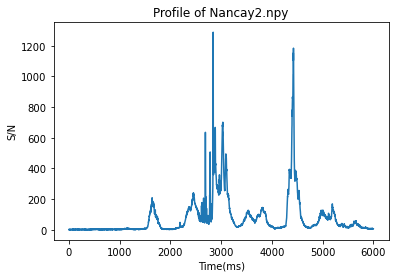

In [105]:
plt.plot(time, data)
plt.title(f"Profile of {file}")
plt.xlabel("Time(ms)")
plt.ylabel("S/N")

### Cut noise manually 
Because the burst contains multiple peaks and a lot of substructure, we cut these burst manually for this test run.

In [97]:
# Get shortenend lightcurve keeping only one boxcar width on either side of the peak
time_cut = time[500:3000] # from seconds to milliseconds
snr_cut = data[500:3000]

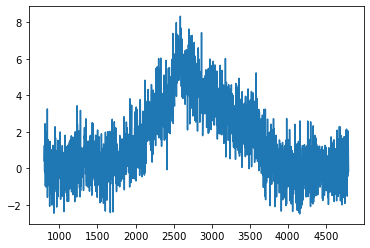

In [98]:
plt.plot(time_cut, snr_cut)

In [103]:
# Convert into .dat file with columns time, flux and flux error 
df = pd.DataFrame(time_cut, columns=['time'])
df['snr'] = snr_cut
df['snr_err'] = 1.0  
position = file.index('.')

filename = file.removesuffix(".npy")

df.to_csv(f"{datadir}/{filename}_cut.dat", sep=" ", header=False, index=False)